In [1]:
!pip install tensorflow


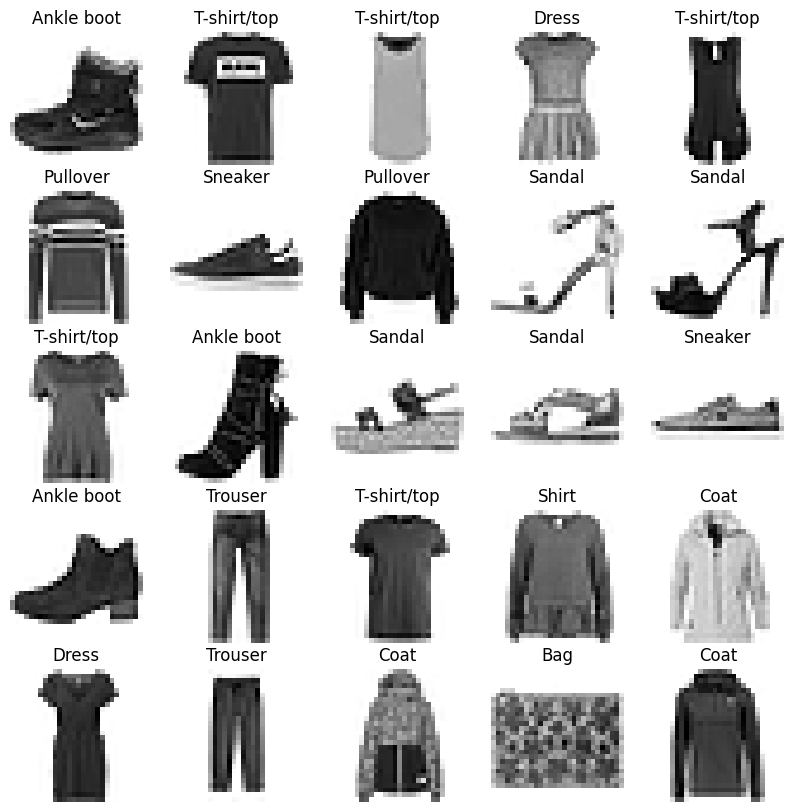

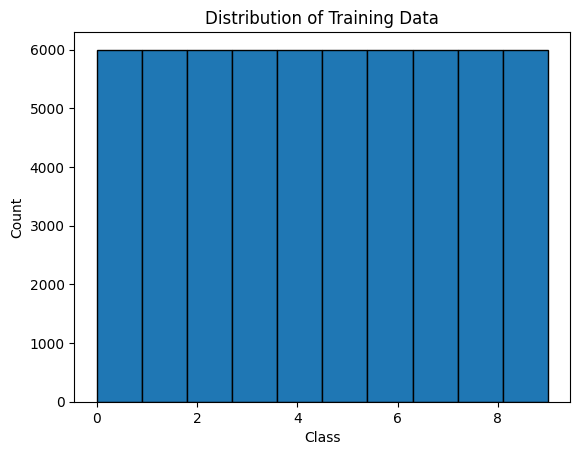

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Define class names for better visualization
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Display a few images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

# Check the distribution of the data
plt.figure()
plt.hist(train_labels, bins=10, edgecolor='black')
plt.title('Distribution of Training Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Normalize the pixel values to be between 0 and 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32) / 255.0
    return images, labels

# Apply normalization to the datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).map(normalize)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).map(normalize)

# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),       # Flatten the 28x28 images to a 1D array
    layers.Dense(128, activation='relu'),        # Fully connected layer with ReLU activation
    layers.Dense(10, activation='softmax')       # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


In [3]:
# Set the number of epochs
epochs = 10

# Train the model
history = model.fit(train_dataset.shuffle(60000).batch(32),
                    epochs=epochs,
                    validation_data=test_dataset.batch(32))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset.batch(32))
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.5006 - accuracy: 0.8249 - val_loss: 0.4278 - val_accuracy: 0.8497
Epoch 2/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3781 - accuracy: 0.8645 - val_loss: 0.4075 - val_accuracy: 0.8565
Epoch 3/10
1875/1875 [==============================] - 18s 8ms/step - loss: 0.3378 - accuracy: 0.8771 - val_loss: 0.3772 - val_accuracy: 0.8677
Epoch 4/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3166 - accuracy: 0.8841 - val_loss: 0.3629 - val_accuracy: 0.8734
Epoch 5/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2973 - accuracy: 0.8912 - val_loss: 0.3360 - val_accuracy: 0.8813
Epoch 6/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2811 - accuracy: 0.8959 - val_loss: 0.3551 - val_accuracy: 0.8726
Epoch 7/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2705 - accuracy: 0.9005 - val_loss: 0.3515 - val_acc

In [5]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(69, activation='leaky_relu'),  # Leaky ReLU
    layers.Dense(42, activation='elu'),        # ELU
    layers.Dense(10, activation='softmax')
])

# Example with a custom learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set the number of epochs
epochs = 10

# Train the model
history = model.fit(train_dataset.shuffle(60000).batch(32),
                    epochs=epochs,
                    validation_data=test_dataset.batch(32))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset.batch(32))
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Epoch 1/11
1875/1875 [==============================] - 12s 4ms/step - loss: 0.4860 - accuracy: 0.8245 - val_loss: 0.4157 - val_accuracy: 0.8510
Epoch 2/11
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3668 - accuracy: 0.8657 - val_loss: 0.4041 - val_accuracy: 0.8560
Epoch 3/11
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3314 - accuracy: 0.8766 - val_loss: 0.3510 - val_accuracy: 0.8726
Epoch 4/11
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3101 - accuracy: 0.8848 - val_loss: 0.3789 - val_accuracy: 0.8571
Epoch 5/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2912 - accuracy: 0.8909 - val_loss: 0.3715 - val_accuracy: 0.8679
Epoch 6/11
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2779 - accuracy: 0.8975 - val_loss: 0.3337 - val_accuracy: 0.8791
Epoch 7/11
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2661 - accuracy: 0.9000 - val_loss: 0.3280 - val_accu

In [6]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(152, activation='relu'),
    layers.Dense(54, activation='leaky_relu'),  # Leaky ReLU
    layers.Dense(42, activation='elu'),        # ELU
    layers.Dense(29, activation='elu'),        # ELU
    layers.Dense(10, activation='softmax')
])

# Example with a custom learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set the number of epochs
epochs = 10

# Train the model
history = model.fit(train_dataset.shuffle(60000).batch(32),
                    epochs=epochs,
                    validation_data=test_dataset.batch(32))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset.batch(32))
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Epoch 1/10
1875/1875 [==============================] - 16s 7ms/step - loss: 0.4925 - accuracy: 0.8225 - val_loss: 0.4314 - val_accuracy: 0.8420
Epoch 2/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.3680 - accuracy: 0.8656 - val_loss: 0.3968 - val_accuracy: 0.8563
Epoch 3/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3282 - accuracy: 0.8784 - val_loss: 0.3639 - val_accuracy: 0.8688
Epoch 4/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.3082 - accuracy: 0.8857 - val_loss: 0.3528 - val_accuracy: 0.8709
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2930 - accuracy: 0.8908 - val_loss: 0.3647 - val_accuracy: 0.8705
Epoch 6/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2799 - accuracy: 0.8954 - val_loss: 0.3347 - val_accuracy: 0.8812
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2670 - accuracy: 0.8989 - val_loss: 0.3318 - val_acc

In [7]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(64, activation='relu'),
    layers.Dense(30, activation='relu'),  # Leaky ReLU
    layers.Dense(29, activation='elu'),        # ELU
    layers.Dense(10, activation='softmax')
])

# Example with a custom learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set the number of epochs
epochs = 30

# Train the model
history = model.fit(train_dataset.shuffle(60000).batch(32),
                    epochs=epochs,
                    validation_data=test_dataset.batch(32))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset.batch(32))
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Epoch 1/30
1875/1875 [==============================] - 11s 4ms/step - loss: 0.7889 - accuracy: 0.7480 - val_loss: 0.5456 - val_accuracy: 0.8143
Epoch 2/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4869 - accuracy: 0.8334 - val_loss: 0.4799 - val_accuracy: 0.8333
Epoch 3/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4384 - accuracy: 0.8484 - val_loss: 0.4536 - val_accuracy: 0.8428
Epoch 4/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4110 - accuracy: 0.8563 - val_loss: 0.4459 - val_accuracy: 0.8452
Epoch 5/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3922 - accuracy: 0.8623 - val_loss: 0.4326 - val_accuracy: 0.8483
Epoch 6/30
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3775 - accuracy: 0.8681 - val_loss: 0.4132 - val_accuracy: 0.8556
Epoch 7/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.3653 - accuracy: 0.8716 - val_loss: 0.4050 - val_accur

In [8]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(200, activation='relu'),
    layers.Dense(62, activation='relu'),  # Leaky ReLU
    layers.Dense(10, activation='softmax')
])

# Example with a custom learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set the number of epochs
epochs = 15

# Train the model
history = model.fit(train_dataset.shuffle(60000).batch(28),
                    epochs=epochs,
                    validation_data=test_dataset.batch(28))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset.batch(28))
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


Epoch 1/15
2143/2143 [==============================] - 12s 4ms/step - loss: 0.4897 - accuracy: 0.8254 - val_loss: 0.4345 - val_accuracy: 0.8478
Epoch 2/15
2143/2143 [==============================] - 9s 4ms/step - loss: 0.3651 - accuracy: 0.8660 - val_loss: 0.3732 - val_accuracy: 0.8675
Epoch 3/15
2143/2143 [==============================] - 10s 4ms/step - loss: 0.3262 - accuracy: 0.8806 - val_loss: 0.3518 - val_accuracy: 0.8748
Epoch 4/15
2143/2143 [==============================] - 10s 4ms/step - loss: 0.3038 - accuracy: 0.8871 - val_loss: 0.3519 - val_accuracy: 0.8734
Epoch 5/15
2143/2143 [==============================] - 10s 4ms/step - loss: 0.2873 - accuracy: 0.8922 - val_loss: 0.3533 - val_accuracy: 0.8732
Epoch 6/15
2143/2143 [==============================] - 11s 4ms/step - loss: 0.2729 - accuracy: 0.8984 - val_loss: 0.3427 - val_accuracy: 0.8766
Epoch 7/15
2143/2143 [==============================] - 10s 4ms/step - loss: 0.2600 - accuracy: 0.9030 - val_loss: 0.3493 - val_acc

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(200, activation='relu'),
    layers.Dense(62, activation='relu'),  # Leaky ReLU
    layers.Dense(10, activation='softmax')
])

# Example with a custom learning rate
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=custom_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set the number of epochs
epochs = 14

# Train the model
history = model.fit(train_dataset.shuffle(60000).batch(28),
                    epochs=epochs,
                    validation_data=test_dataset.batch(28))

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset.batch(28))
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")
